<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Ejercicio 2 TP5

#### Por Matías Marfisi


# Consigna

![Consigna](Consigna1.png "Consigna")

## Desarrollo

![1](Desarrollo/1.jpeg "1")

## Simulación

In [28]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

In [31]:
def print_analog_digital(w_z, H_z, fs, w_s, H_s):
    plt.close('all')
    fig, ax = plt.subplots(2,1)
    ax[0].set_title('Respuesta de modulo') 
    ax[0].semilogx(w_z*fs, 20 * np.log10(abs(H_z)), 'b--', w_s, 20 * np.log10(abs(H_s)), 'g-') 
    ax[0].set_ylabel('Amplitud [dB]') 
    ax[0].set_xlabel('Frecuencia [rad/seg]') 
    ax[0].grid(True) 
    ax[0].legend(['H(z)', 'H(s)']) 
    ax[0].set_xlim([1, 1e6]) 
    ax[0].set_ylim([-160, 10]) 
    angles_z = np.unwrap(np.angle(H_z)) 
    angles_s = np.unwrap(np.angle(H_s)) 
    ax[1].set_title('Respuesta de fase') 
    ax[1].semilogx(w_z*fs, angles_z, 'b--', w_s, angles_s, 'g') 
    ax[1].set_ylabel('Angulo (radianes)') 
    ax[1].grid(True)
    ax[1].legend(['H(z)', 'H(s)']) 
    ax[1].set_xlim([1, 1e6]) 
    ax[1].set_ylim([-3.5, 0]) 

#### $f_c=1KHz\;\;\;\;\;f_s=100KHz$

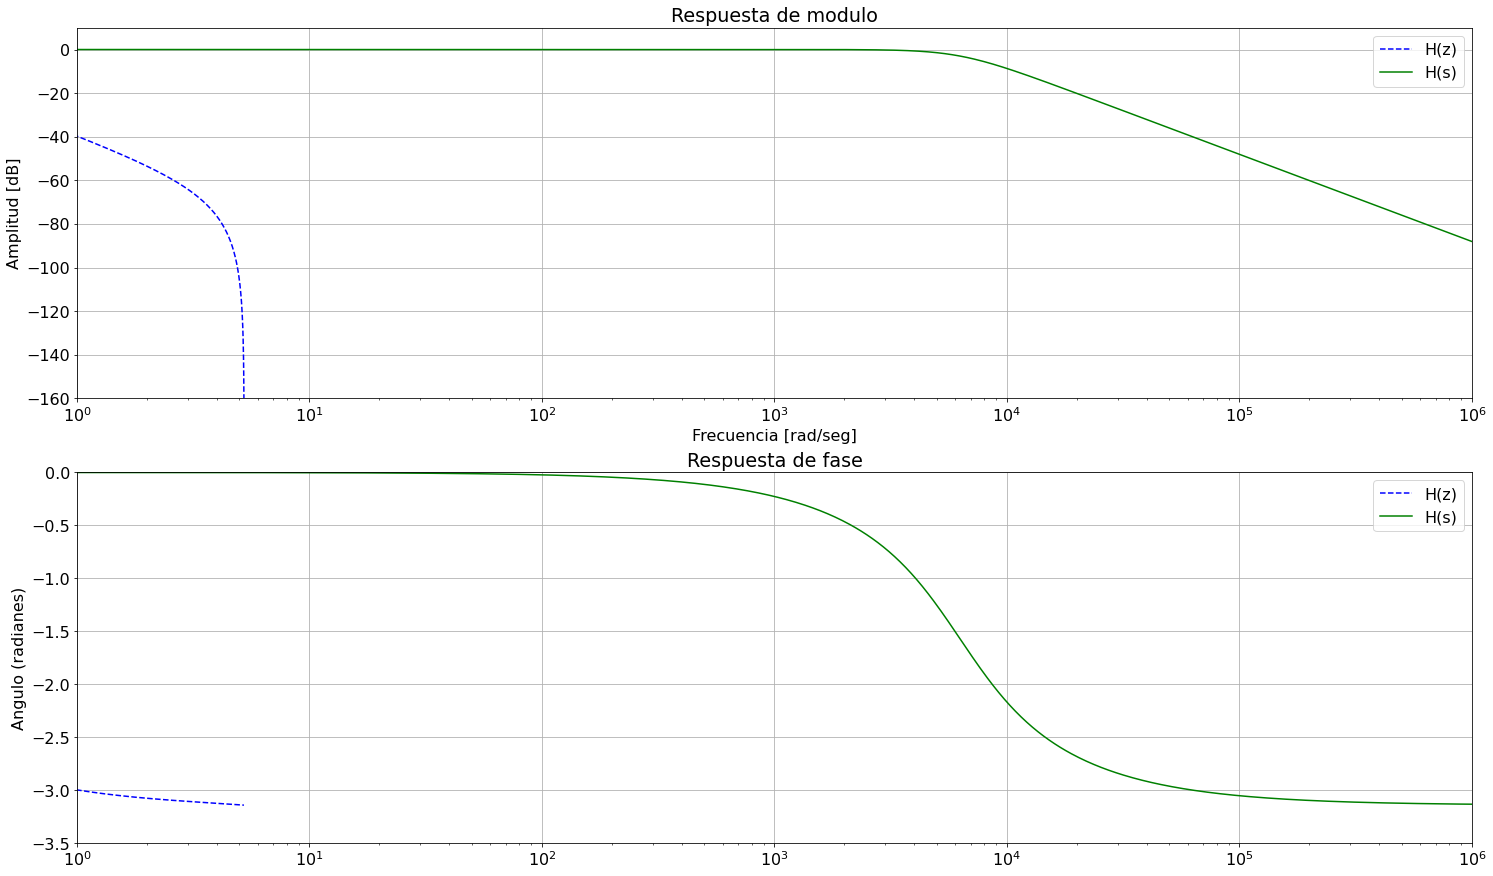

In [32]:
fc = 1e3
wo = 2*np.pi*fc
num1 = np.array([wo**2])
den1 = np.array([1, np.sqrt(2)*wo, wo**2])

# Módulo y fase analógica
w_s, H_s = sig.freqs(num1, den1, worN = np.logspace(-1,7,1000))

# Módulo y fase digital
fs1 = 100e3
num1_z, den1_z = sig.bilinear(num1, den1, fs = fs1)
w_z, H_z = sig.freqz(num1_z, den1_z)

# Ploteo analógica y digital
print_analog_digital(w_z, H_z, fs, w_s, H_s)

#### $f_c=1KHz\;\;\;\;\;f_s=10KHz$

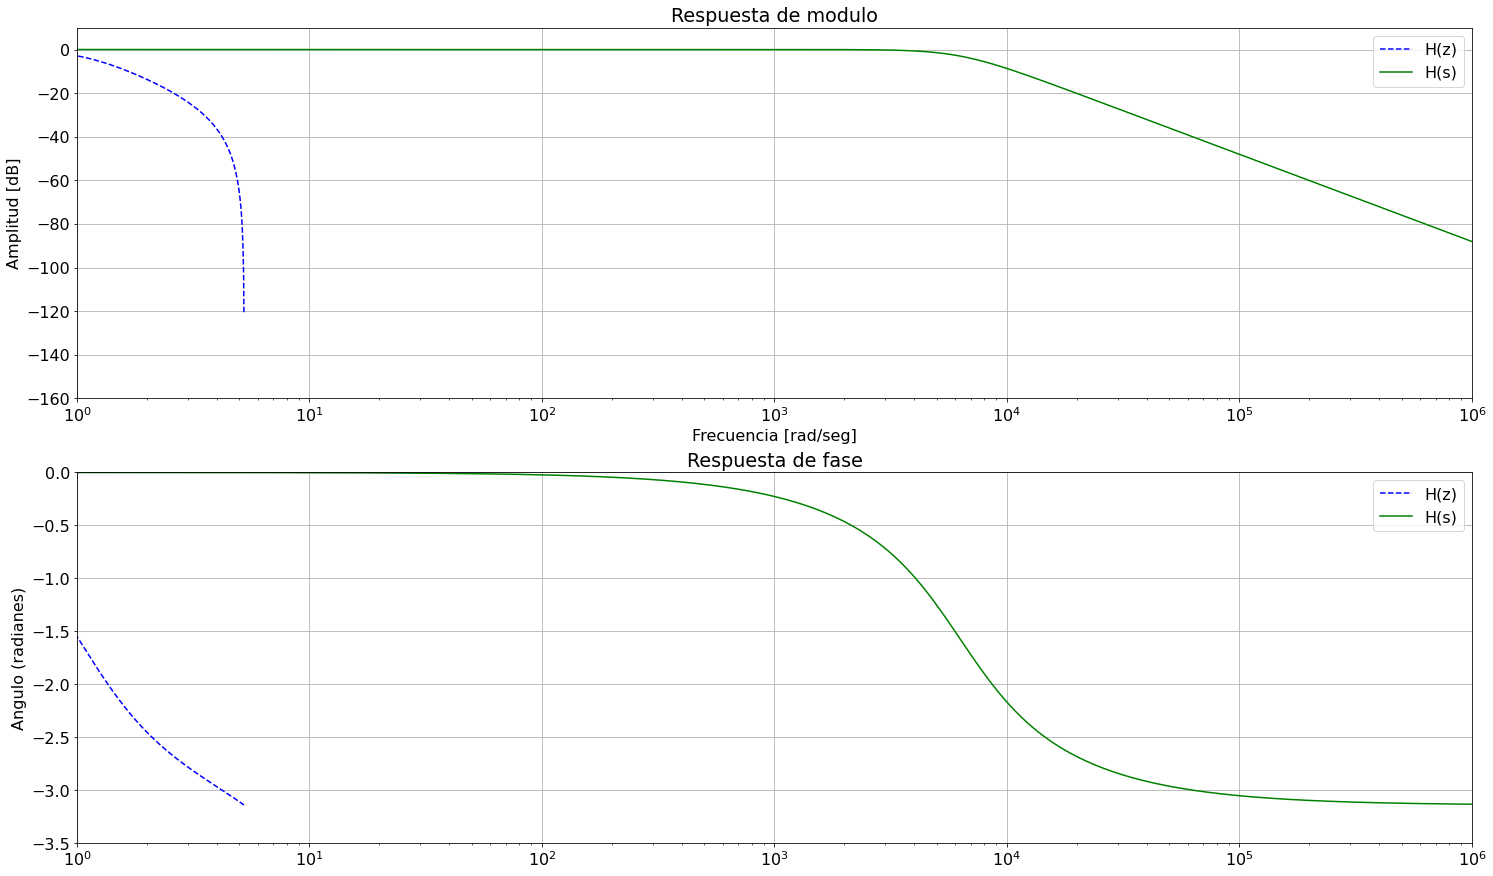

In [33]:
fc = 1e3
wo = 2*np.pi*fc
num1 = np.array([wo**2])
den1 = np.array([1, np.sqrt(2)*wo, wo**2])

# Módulo y fase analógica
w_s, H_s = sig.freqs(num1, den1, worN = np.logspace(-1,7,1000))

# Módulo y fase digital
fs1 = 10e3
num1_z, den1_z = sig.bilinear(num1, den1, fs = fs1)
w_z, H_z = sig.freqz(num1_z, den1_z)

# Ploteo analógica y digital
print_analog_digital(w_z, H_z, fs, w_s, H_s)

#### $f_c=6KHz\;\;\;\;\;f_s=100KHz$

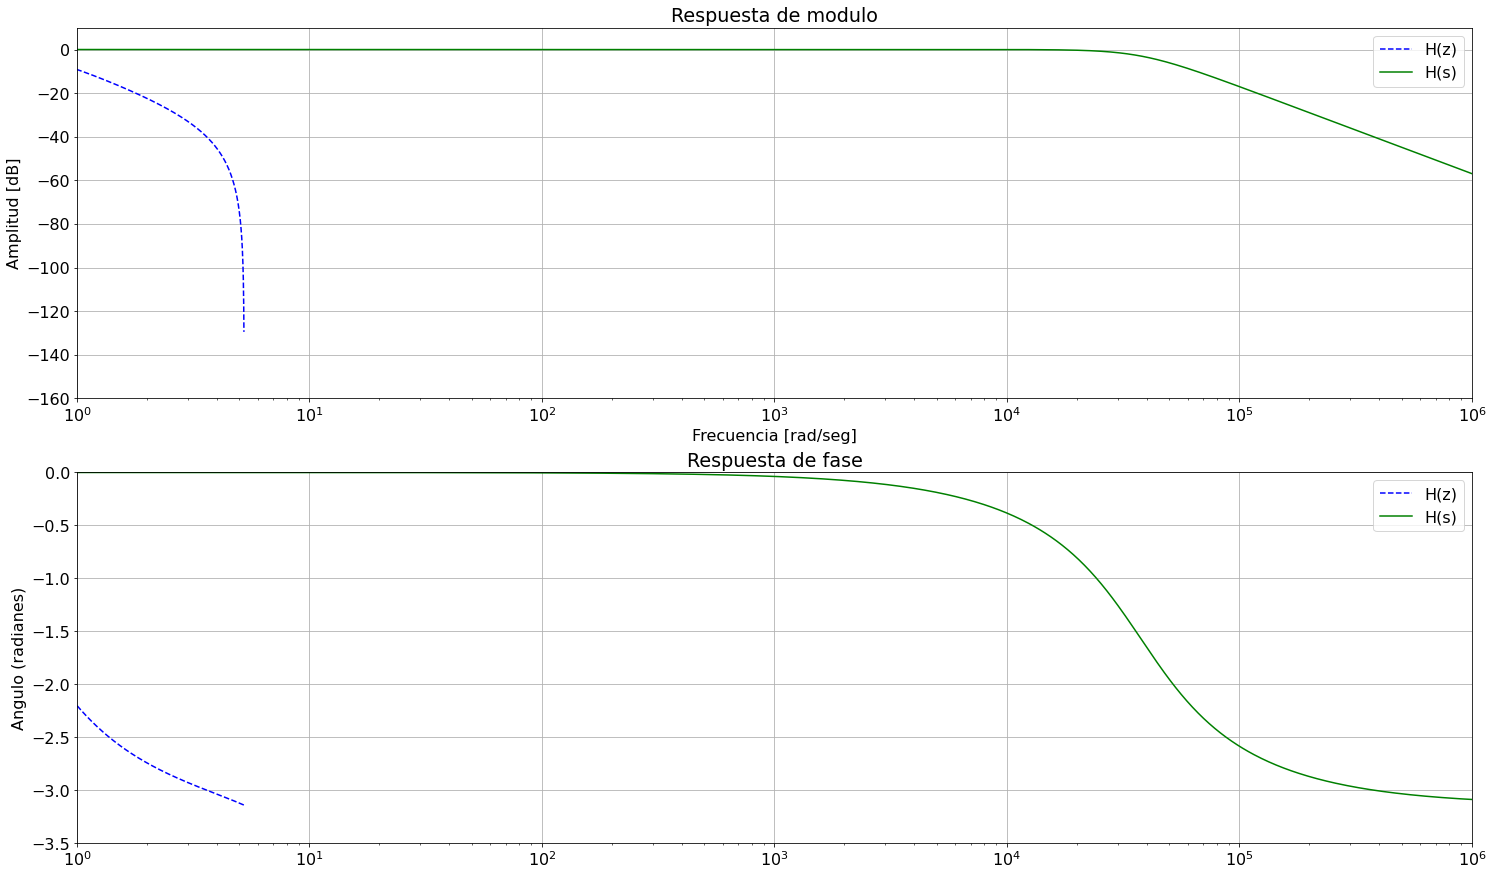

In [34]:
fc = 6e3
wo = 2*np.pi*fc
num1 = np.array([wo**2])
den1 = np.array([1, np.sqrt(2)*wo, wo**2])

# Módulo y fase analógica
w_s, H_s = sig.freqs(num1, den1, worN = np.logspace(-1,7,1000))

# Módulo y fase digital
fs1 = 100e3
num1_z, den1_z = sig.bilinear(num1, den1, fs = fs1)
w_z, H_z = sig.freqz(num1_z, den1_z)

# Ploteo analógica y digital
print_analog_digital(w_z, H_z, fs, w_s, H_s)

#### $f_c=6KHz\;\;\;\;\;f_s=10KHz$

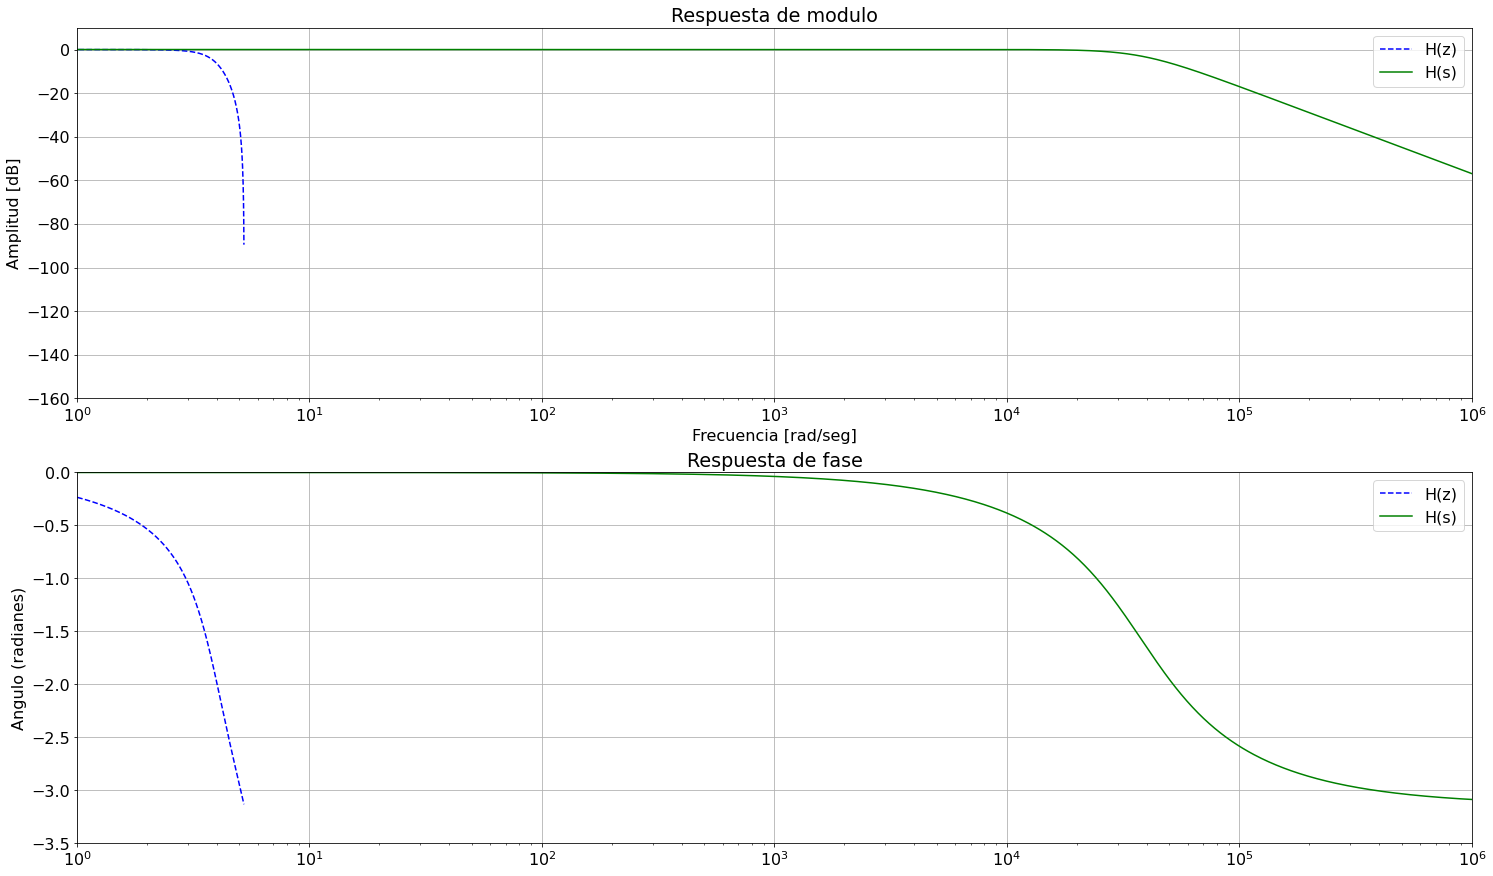

In [35]:
fc = 6e3
wo = 2*np.pi*fc
num1 = np.array([wo**2])
den1 = np.array([1, np.sqrt(2)*wo, wo**2])

# Módulo y fase analógica
w_s, H_s = sig.freqs(num1, den1, worN = np.logspace(-1,7,1000))

# Módulo y fase digital
fs1 = 10e3
num1_z, den1_z = sig.bilinear(num1, den1, fs = fs1)
w_z, H_z = sig.freqz(num1_z, den1_z)

# Ploteo analógica y digital
print_analog_digital(w_z, H_z, fs, w_s, H_s)

Se podría aplicar prewarping en los casos de fs = 100KHz (A y C 100KHz), ya que estos quedan atenuados en baja frecuencia, se podría ajustar el punto inicial para así lograr obtener el comportamiento pasabajos.

# Consigna

![Consigna](Consigna2.png "Consigna")

![Consigna](Consigna3.png "Consigna")

## Desarrollo

![2](Desarrollo/2.jpeg "2")

Para que la salida represente la media aritmética, debería dividirse cada muestra de salida por el total de muestras de la entrada utilizadas para el promedio. Y como el filtro de media móvil tiene una naturaleza pasabajos, elimina completamente la frecuencia en pi o fs/2, por lo que si quiero eliminar la frecuencia de linea de 50Hz debería colocar 100 Hz de Fs.

![3](Desarrollo/3.jpeg "3")

Ambos sistemas introducen una demora de media muestra, esto no es deseado ya que genera una incertidumbre sobre la muestra siguiente, pudiendo ser 1 muestra o ninguna. La respuesta de módulo de un derivador es una función lineal, por lo que consideraremos las funciones dadas ideales hasta cierta frecuencia con la tolerancia presentada. El segundo sistema se comporta como un derivador ideal hasta Omega = 0.5515, pero presenta la ventaja de atenuar las altas frecuencias, disminuyendo así en una señal de baja frecuencia la inferencia del ruido en la diferencia. El primer sistema, deja pasar más facilmente las muestras de alta frecuencia que en el rango que se comporta como un derivador (parte lineal).